<a href="https://colab.research.google.com/github/RajAakash/torch/blob/main/TorchNNPractise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.003,
                 random_state=42)

len(X),len(y)

(1000, 1000)

In [ ]:
import pandas as pd
circles=pd.DataFrame({
    "X1":X[:,0],
    "X2":X[:,1],
    "label":y
})
circles.head(10)

,X1,X2,label
0,0.770499,0.210954,1
1,-0.786030,0.132425,1
2,-0.795862,0.107568,1
3,-0.345934,0.720764,1
4,0.437625,-0.899137,0
5,-0.492824,0.633771,1
6,-0.010412,0.800278,1
7,0.787565,0.131875,1
8,-0.160723,-0.784841,1
9,-0.136160,0.993566,0


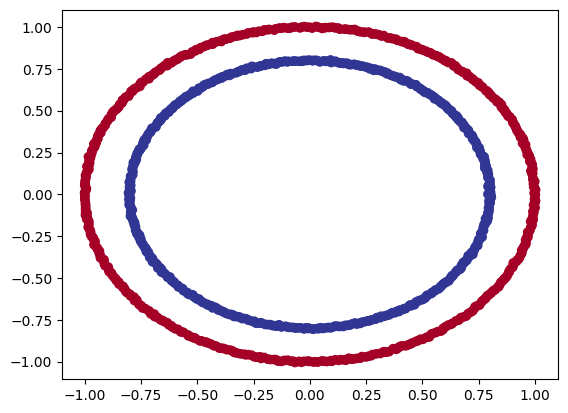

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
X.shape,y.shape #shape=(1000,2) size=>1000*2=2000

((1000, 2), (1000,))

In [ ]:
X[0]

array([0.77049941, 0.21095396])

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(700, 300, 700, 300)

In [ ]:
import torch
from torch import nn
device='cuda' if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

    # self.two_layer_model=nn.Sequential(
    #   nn.Linear(in_features=2,out_features=5),
    #   nn.Linear(in_features=5,out_features=1)
    # )

  #x->layer1->layer2->output
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
    # return self.two_layer_model(x)

model_0=CircleModel().to(device=device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

In [ ]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
X_test=torch.from_numpy(X_test)

In [ ]:
y_preds=model_0(X_test.to(device))
print(f"Length of predictions:{len(y_preds)}")

RuntimeError: ignored

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.001)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc